# LTI System Impulse Response Demonstration

This notebook illustrates how an LTI system output \( y(t) \) can be computed by:
1. Convolving an input signal \( x(t) \) with the system's impulse response \( h(t) \).
2. Approximating \( x(t) \) as a sum of scaled impulses and adding up the corresponding scaled and shifted impulse responses.

We'll use a simple first-order exponential decay system:
$$
h(t) = e^{-t}u(t),
$$
where \( u(t) \) is the unit step (i.e., \( u(t) = 1 \) for \( t \ge 0 \) and 0 otherwise).

Our example input is a rectangular pulse:
$$
x(t) = 
\begin{cases}
1, & 0 \le t < 1 \\
0, & \text{otherwise}
\end{cases}
$$


# 💊 Practical Example: Drug Injection and Bloodstream Response

Let’s relate this system to a **real-world biomedical example**:  
**Intravenous (IV) drug injection** and the way the drug concentration changes in the bloodstream over time.

---

## 🎯 Scenario

- You inject a dose of medication into the bloodstream — this is your **input signal** $x(t)$.
- The body metabolizes and removes the drug over time — this is modeled by the **impulse response** $h(t)$.
- The resulting **drug concentration in the blood** over time is the **output** $y(t)$.

---

## 🟦 Input $x(t)$: The Drug Dose
- A single injection is modeled as a **rectangular pulse**: the drug is delivered over a short time window (e.g., 5 seconds).
- **Pulse Width**: duration of the injection.
- **Pulse Amplitude**: dosage strength.

This is the blue curve in the first plot.

---

## 🔴 Impulse Response $h(t)$: Body’s Elimination Curve
## $$h(t) = e^{-t/\tau} u(t)$$
- This is the **impulse response** of a **first-order linear system** — one of the most common types of systems in biomedical and physical sciences.
- The body **removes the drug** at a certain rate.
- This is modeled as an **exponential decay**, because the elimination process often follows **first-order kinetics** (i.e., rate ∝ concentration).
- The **time constant $\tau$** controls how quickly the drug is cleared:
  - Small $\tau$: fast metabolism (short-lasting drug).
  - Large $\tau$: slow metabolism (long-lasting drug).

This is the red curve in the second plot.

---

## 🟢⚫ Output $y(t)$: Drug Concentration Over Time

- The actual concentration of the drug in the blood is found by **convolving** the dose with the body's response.
- This is shown as:
  - **Black dashed line**: from direct convolution.
  - **Green solid line**: by summing individual impulse responses over time.

This output reflects how:
- The body continues to "feel" the drug **even after** the injection ends.
- A slow-decaying impulse response leads to **longer-lasting effects**.
- The total exposure depends on **both** the dose and the metabolic rate.

---

## 🧠 Why This Matters

This kind of analysis is used in **pharmacokinetics** to:

- Design drug dosing schedules.
- Understand how different bodies respond to drugs.
- Simulate how long a drug stays in the system.
- Predict when a second dose is needed to maintain a therapeutic level.

In short: **Convolution helps predict the outcome of real physiological systems** when given known inputs and responses.

---

## 🔄 Try It Out

Using the interactive demo:
- Increase the **pulse width** to simulate a slower injection.
- Increase the **amplitude** to simulate a stronger dose.
- Adjust **τ** to simulate how different people metabolize the drug.

Watch how the concentration curve $y(t)$ changes — this is exactly the kind of system modeling used in biomedical engineering!



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact, FloatSlider, IntSlider

# Ensure plots show up interactively
%matplotlib inline

def lti_demo(pulse_width=1.0, 
             pulse_amplitude=1.0, 
             tau=1.0, 
             t_max=4.0, 
            ):
    """
    Interactive LTI demo:
    - Input x(t): Rectangular pulse of width = pulse_width, amplitude = pulse_amplitude
    - Impulse response h(t): e^(-t/tau)*u(t)
    - Compare direct convolution vs. explicit sum of scaled impulses
    """
    dt=0.001
    # 1. Time axis
    t = np.arange(0, t_max, dt)

    # 2. Input signal: rectangular pulse
    #    x(t) = pulse_amplitude for 0 <= t < pulse_width, else 0
    x = np.where((t >= 0) & (t < pulse_width), pulse_amplitude, 0.0)

    # 3. Impulse response h(t) = e^(-t/tau) * u(t)
    h = np.exp(-t/tau) * np.where(t >= 0, 1.0, 0.0)

    # --- Method A: Direct Convolution ---
    y_direct = np.convolve(x, h, mode='full') * dt
    N_full = len(y_direct)
    t_conv = np.arange(N_full) * dt
    y_direct = y_direct[0:len(t)]
    t_conv = t_conv[0:len(t)]

    # --- Method B: Sum of Scaled Impulses ---
    y_approx = np.zeros_like(t)
    for i, ti in enumerate(t):
        tau_vec = ti - t  # shifted times
        shifted_h = np.exp(-tau_vec/tau) * np.where(tau_vec >= 0, 1.0, 0.0)
        y_approx[i] = np.sum(x * shifted_h) * dt

    # Plot
    fig, axs = plt.subplots(3, 1, figsize=(8, 8))

    # Subplot 1: Input
    axs[0].plot(t, x, 'b-', linewidth=2)
    axs[0].set_title("Input Signal x(t)")
    axs[0].set_xlabel('Time [s]')
    axs[0].set_ylabel('Amplitude')
    axs[0].grid(True)

    # Subplot 2: Impulse response
    axs[1].plot(t, h, 'r-', linewidth=2)
    axs[1].set_title(f"Impulse Response h(t) = e^(-t/{round(tau,3)})u(t)")
    axs[1].set_xlabel('Time [s]')
    axs[1].set_ylabel('Amplitude')
    axs[1].grid(True)

    # Subplot 3: Output (direct vs. sum-of-impulses)
    axs[2].plot(t_conv, y_direct, 'k--', label='Direct Convolution')
    axs[2].plot(t, y_approx, 'g-', label='Sum of Scaled Impulses')
    axs[2].set_title("Output y(t)")
    axs[2].set_xlabel('Time [s]')
    axs[2].set_ylabel('Amplitude')
    axs[2].legend()
    axs[2].grid(True)

    plt.tight_layout()
    plt.show()

# Use ipywidgets.interact to create sliders
_ = interact(
    lti_demo,
    pulse_width=FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='Pulse Width'),
    pulse_amplitude=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Pulse Amplitude'),
    tau=FloatSlider(value=1.0, min=0.1, max=5.0, step=0.1, description='Time Constant (τ)'),
    t_max=FloatSlider(value=4.0, min=1.0, max=10.0, step=0.5, description='Time Range'),
)


interactive(children=(FloatSlider(value=1.0, description='Pulse Width', max=3.0, min=0.1), FloatSlider(value=1…

## 🧮 How Did We Find $h(t)$?

We defined the system as a **first-order linear system**, which is common in many biomedical processes. The system is modeled by the following differential equation:

$$
\frac{dy(t)}{dt} + \frac{1}{\tau} y(t) = x(t)
$$

Here:
- $x(t)$ is the **input** (e.g., a drug injection),
- $y(t)$ is the **output** (e.g., the drug concentration in the bloodstream),
- $\tau$ is the **time constant**, which controls how quickly the system returns to baseline.

---

### 🔎 Step 1: Find the Impulse Response

To find the impulse response $h(t)$, we apply an **impulse input**:
$$
x(t) = \delta(t)
$$

Then the equation becomes:

$$
\frac{dh(t)}{dt} + \frac{1}{\tau} h(t) = \delta(t)
$$

---

### 🧠 Step 2: Solve the Equation

This is a linear differential equation with a delta input. The solution is:

$$
h(t) = e^{-t/\tau} u(t)
$$

Where:
- $u(t)$ is the **unit step function** that makes the system **causal** (no response before $t = 0$),
- $e^{-t/\tau}$ describes the **exponential decay** of the system.

---

### 🩺 Why This Matters in Practice

This impulse response models many biological and physical systems:

| Domain            | System Modeled                                          |
|------------------|----------------------------------------------------------|
| Pharmacokinetics | Drug clearance from bloodstream                          |
| Neuroscience     | Membrane potential decay after neuron fires              |
| Physiology       | Heart rate or blood pressure returning to baseline       |
| Bioinstrumentation | Sensor voltage output settling after a sudden change  |

So when we use $h(t) = e^{-t/\tau} u(t)$ in our simulation, we are modeling a **simple but powerful** real-world system that students will encounter in biomedical engineering.


## 🎛️ What Does Each Slider Explain?

Each slider in the interactive LTI system demo is designed to illustrate a key concept in system response and convolution. Here's what each one controls and what students should learn from it:

---

### 🎚️ Pulse Width

- **What it changes:** Duration of the input rectangular pulse $x(t)$.
- **Effect on the output:** A wider pulse results in a broader output $y(t)$.
- **Why it's important:**  
  Shows that a system accumulates the effect of the input over time. The longer the stimulus, the longer the system responds.

---

### 🎚️ Pulse Amplitude

- **What it changes:** Height (strength) of the input pulse.
- **Effect on the output:** Output scales proportionally with the input.
- **Why it's important:**  
  Demonstrates the **linearity** of LTI systems: scaling the input directly scales the output.

---

### 🎚️ Time Constant $\tau$

- **What it changes:** The decay rate of the system’s impulse response $h(t) = e^{-t/\tau} u(t)$.
- **Effect on the output:**  
  - Small $\tau$: fast-decaying output (short memory).
  - Large $\tau$: slow-decaying output (long memory).
- **Why it's important:**  
  Illustrates how different systems retain memory of past inputs. Models real-world behaviors like rapid vs. slow drug metabolism.

---

### 🎚️ Time Range

- **What it changes:** The total time shown on the plot.
- **Effect on the output:** A longer time range reveals the full tail of the system’s output.
- **Why it's important:**  
  Encourages students to think about the **duration** of system response and ensures that the entire output curve is captured.

---

### 🎚️ Time Step $\Delta t$

- **What it changes:** Sampling resolution of the simulation.
- **Effect on the output:**  
  - Smaller $\Delta t$: smoother, more accurate output.
  - Larger $\Delta t$: coarser, possibly jagged approximation.
- **Why it's important:**  
  Teaches how **discretization** affects accuracy in numerical modeling. Highlights the importance of resolution when approximating continuous-time signals.

---


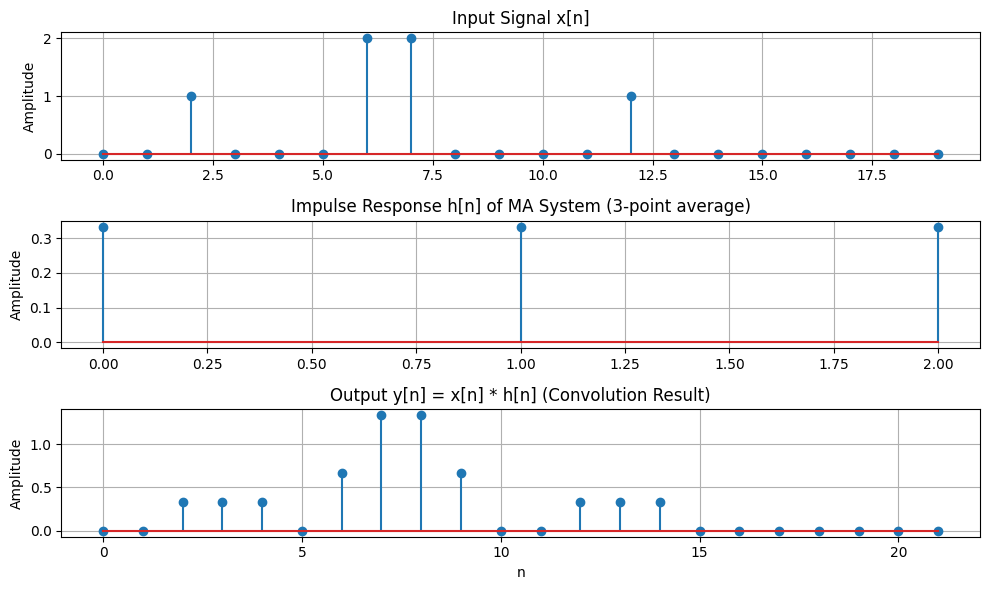

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Time axis
n = np.arange(0, 20)

# Input signal: a short pulse with a spike and flat section
x = np.zeros_like(n, dtype=float)
x[2] = 1
x[6] = 2
x[7] = 2
x[12] = 1

# Impulse response of a 3-point moving average system
h = np.array([1/3, 1/3, 1/3])

# Output by convolution (LTI system behavior)
y = convolve(x, h)

# Time axis for output (longer due to convolution)
n_y = np.arange(0, len(y))

# Plotting
plt.figure(figsize=(10, 6))

# Input
plt.subplot(3, 1, 1)
plt.stem(n, x)
plt.title('Input Signal x[n]')
plt.ylabel('Amplitude')
plt.grid(True)

# Impulse response
plt.subplot(3, 1, 2)
plt.stem(np.arange(0, len(h)), h)
plt.title('Impulse Response h[n] of MA System (3-point average)')
plt.ylabel('Amplitude')
plt.grid(True)

# Output
plt.subplot(3, 1, 3)
plt.stem(n_y, y)
plt.title('Output y[n] = x[n] * h[n] (Convolution Result)')
plt.xlabel('n')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.show()
